In [1]:
!pip install yfinance==0.2.12

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 2.5 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.50
    Uninstalling yfinance-0.2.50:
      Successfully uninstalled yfinance-0.2.50


In [2]:
import yfinance as yf
import pandas as pd

In [3]:
# Define the ticker symbol for Tesla
ticker = "TSLA"

# Download data for the past 5 years
data = yf.download(ticker, period="5y")

[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [28]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy import stats

In [29]:
data = pd.read_csv('tesla_stock_data.csv', index_col='Date', parse_dates=True)
ts_data = data['Adj Close']

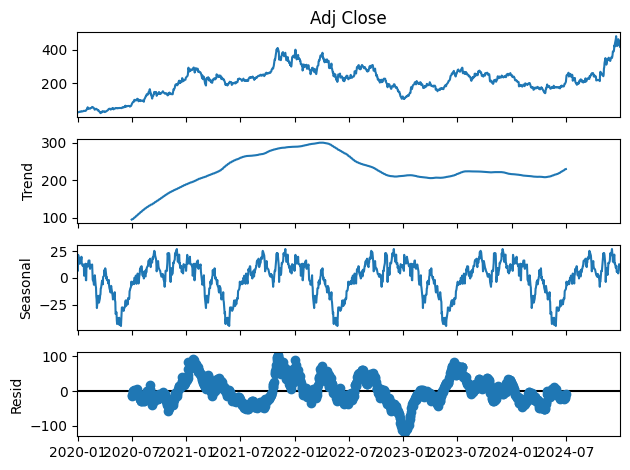

In [30]:
decomposition = seasonal_decompose(ts_data, model='additive', period=252)  # Assuming yearly seasonality (252 trading days)
decomposition.plot()
plt.show()

In [31]:
result = adfuller(ts_data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -2.020710949878318
p-value: 0.27756654529582614


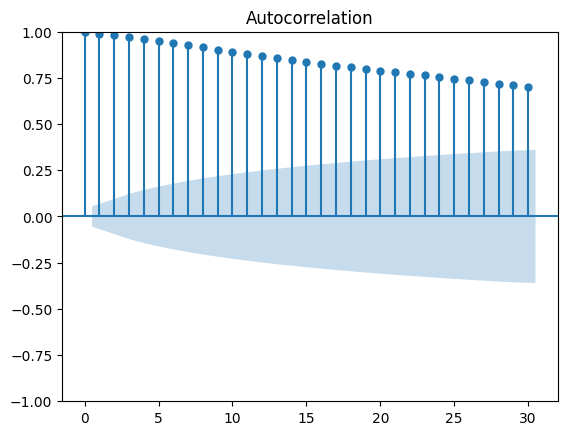

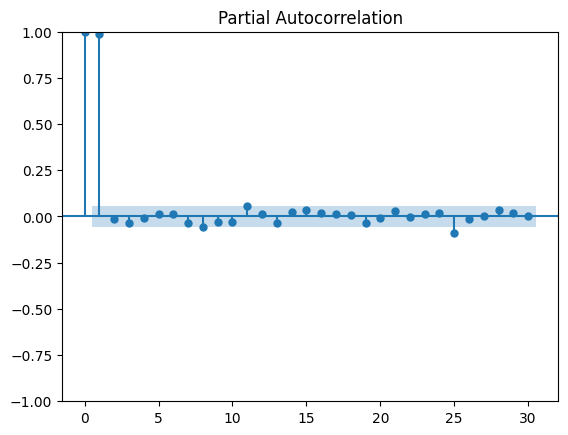

In [32]:
plot_acf(ts_data, lags=30)
plot_pacf(ts_data, lags=30)
plt.show()

In [33]:
# Split data into train and test sets
train_data = ts_data[:-30]
test_data = ts_data[-30:]

# Simple Exponential Smoothing
ses_model = SimpleExpSmoothing(train_data).fit()
ses_forecast = ses_model.forecast(len(test_data))

# Holt's Smoothing
holt_model = Holt(train_data).fit()
holt_forecast = holt_model.forecast(len(test_data))

# ARIMA
# Replace (p, d, q) with values obtained from ACF/PACF analysis
arima_model = ARIMA(train_data, order=(5, 1, 0)).fit()
arima_forecast = arima_model.predict(start=len(train_data), end=len(ts_data)-1)

# Evaluation metrics
def evaluate_model(forecast, actual):
    rmse = np.sqrt(mean_squared_error(actual, forecast))
    mae = mean_absolute_error(actual, forecast)
    # MASE calculation (you'll need to define a naive forecast for this)
    # mase = ...
    return rmse, mae #, mase

ses_rmse, ses_mae = evaluate_model(ses_forecast, test_data)
holt_rmse, holt_mae = evaluate_model(holt_forecast, test_data)
arima_rmse, arima_mae = evaluate_model(arima_forecast, test_data)

print("Simple Exponential Smoothing - RMSE:", ses_rmse, "MAE:", ses_mae)
print("Holt's Smoothing - RMSE:", holt_rmse, "MAE:", holt_mae)
print("ARIMA - RMSE:", arima_rmse, "MAE:", arima_mae)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/

Simple Exponential Smoothing - RMSE: 92.30906048359921 MAE: 79.3068693635162
Holt's Smoothing - RMSE: 87.20657233669134 MAE: 74.72170070194498
ARIMA - RMSE: 93.4879484526116 MAE: 80.64423771353455


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [34]:
# Shapiro-Wilk Test for normality
shapiro_stat, shapiro_p = stats.shapiro(arima_model.resid)
print("Shapiro-Wilk Test - Statistic:", shapiro_stat, "p-value:", shapiro_p)

# Ljung-Box Test for autocorrelation
ljung_stat, ljung_p = acorr_ljungbox(arima_model.resid, lags=[10])
print("Ljung-Box Test - Statistic:", ljung_stat, "p-value:", ljung_p)

Shapiro-Wilk Test - Statistic: 0.9467944916570632 p-value: 1.2364299272773452e-20
Ljung-Box Test - Statistic: lb_stat p-value: lb_pvalue


In [36]:
# Assuming 'data' is your DataFrame
# The 'Date' column is already the index, so reset it to a column
data = data.reset_index()

# Convert 'Date' column to datetime objects
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' as index again if needed
data = data.set_index('Date')

# Resample to daily frequency and forward fill
data_resampled = data.resample('D').ffill()

# Now, 'data_resampled' will have a daily frequency with missing values filled using forward fill.

In [37]:
data.describe

<bound method NDFrame.describe of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-12-31   27.000000   28.086000   26.805332   27.888666   27.888666   
2020-01-02   28.299999   28.713333   28.114000   28.684000   28.684000   
2020-01-03   29.366667   30.266666   29.128000   29.534000   29.534000   
2020-01-06   29.364668   30.104000   29.333332   30.102667   30.102667   
2020-01-07   30.760000   31.441999   30.224001   31.270666   31.270666   
...                ...         ...         ...         ...         ...   
2024-12-23  431.000000  434.510010  415.410004  430.600006  430.600006   
2024-12-24  435.899994  462.779999  435.140015  462.279999  462.279999   
2024-12-26  465.160004  465.329987  451.019989  454.130005  454.130005   
2024-12-27  449.519989  450.000000  426.500000  431.660004  431.660004   
2024-12-30  419.399994  427.000000  415.750000  417.410004  417.410004   

               Volume  
Date                   
2019-12-31  154285500  
2020-01-02  142981500  
2020-01-03  266677500  
2020-01-06  151995000  
2020-01-07  268231500  
...               ...  
2024-12-23   72698100  
2024-12-24   59551800  
2024-12-26   76366400  
2024-12-27   82666800  
2024-12-30   64403000  

[1258 rows x 6 columns]>

In [38]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,27.000000,28.086000,26.805332,27.888666,27.888666,154285500
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
